# Ozone Level - Mt. Rainer
##### Rie Durnel and Kevin Olbright 
##### CPSC 322, Spring 2022

## Introduction 
For this project we chose the EPA's ozone and weather measurements for Mt. Rainer beginning in 2007.   
We were attempting to predict ozone levels based on the weather conditions at the time of measurement.  
#TODO: add the classifier results

## Data Analysis
Our dataset consisted almost entirely of continuous data. Even the non-continuous data was designed to be entirely unique. This meant that we were required to discritize our data in order to ensure that the desicion trees could be constructed or remove unique idenifiers before classifying the data.  
Initially, before cleaning, the dataset had 78888 instances. After removing rows with most of the column data missing, we were left with 36699 rows of data. This was too much for our machines to compute so we pruned the data until we were left with 1050 instances with each ozone level being represented and equal number of times. 

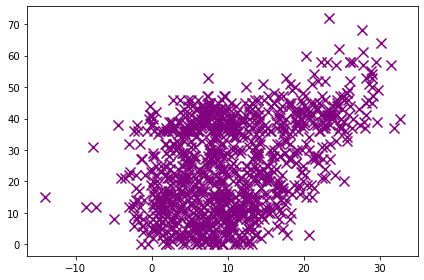

In [2]:
import importlib
import os

import mysklearn.myutils
importlib.reload(mysklearn.myutils)
import mysklearn.myutils as myutils

# uncomment once you paste your mypytable.py into mysklearn package
import mysklearn.mypytable
importlib.reload(mysklearn.mypytable)
from mysklearn.mypytable import MyPyTable 

import mysklearn.myrandomforestclassifier 
importlib.reload(mysklearn.myrandomforestclassifier)
from mysklearn.myrandomforestclassifier import MyRandomForestClassifier
from mysklearn import myvisualization 
continuous_data = MyPyTable()
continuous_data.load_from_file("meteorological-hourly-clean.csv")
x_label = "TEMPERATURE"
y_label = "OZONE"
x_data = continuous_data.get_column(x_label)
y_data = continuous_data.get_column(y_label)

myvisualization.scatter_chart_creation(x_data, y_data, x_label=x_label, y_label=y_label)


## Classification

## Conclusion